In [5]:
from torch import nn
import torch

### y = wx + b

In [6]:
# 0. prepare data
x = torch.rand([500,1])
y = 3*x + 0.8

In [7]:
# 1. define model
class Lr(nn.Module):
    def __init__(self):
        super(Lr, self).__init__() # inheritance init function
        self.linear = nn.Linear(1,1) # number of input feature, number of output feature
    def forward(self, x): # forward calculation
        out = self.linear(x)
        return out

In [8]:
# 2. create model
model = Lr()

In [12]:
# 3. create optimizer (optimize parameters)
from torch.optim import SGD

optimizer = SGD(model.parameters(), 0.001) # learning rate

In [14]:
# 4. define loss function
loss_fn = nn.MSELoss()

In [23]:
# 5. loop, conduct gradient descent, update parameters
for i in range(5000):
    # get predict value
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    # set gradient to 0
    optimizer.zero_grad()
    # conduct backward propagate
    loss.backward()
    # update parameters
    optimizer.step()
    if i%200 == 0:
        params = list(model.parameters())
        print(f'loss: {loss.item()} w: {params[0].item()} b: {params[1].item()}')

loss: 0.0027146057691425085 w: 2.8203635215759277 b: 0.8965009450912476
loss: 0.0025765218306332827 w: 2.8249919414520264 b: 0.894014298915863
loss: 0.0024454158265143633 w: 2.829502582550049 b: 0.8915914297103882
loss: 0.0023210356011986732 w: 2.833894968032837 b: 0.8892311453819275
loss: 0.0022029210813343525 w: 2.838176965713501 b: 0.8869316577911377
loss: 0.002090851776301861 w: 2.842346668243408 b: 0.8846914172172546
loss: 0.001984501490369439 w: 2.8464083671569824 b: 0.8825090527534485
loss: 0.0018835447262972593 w: 2.8503661155700684 b: 0.8803829550743103
loss: 0.0017877169884741306 w: 2.854222297668457 b: 0.8783112168312073
loss: 0.0016967661213129759 w: 2.8579790592193604 b: 0.8762935996055603
loss: 0.0016104470705613494 w: 2.8616387844085693 b: 0.874327540397644
loss: 0.0015285138506442308 w: 2.865204095840454 b: 0.8724119663238525
loss: 0.0014507604064419866 w: 2.8686771392822266 b: 0.8705458641052246
loss: 0.0013769575161859393 w: 2.872061014175415 b: 0.8687278628349304
los

In [28]:
model.eval() # change from training to predict
# model.train(False)
y_pred = model(x)

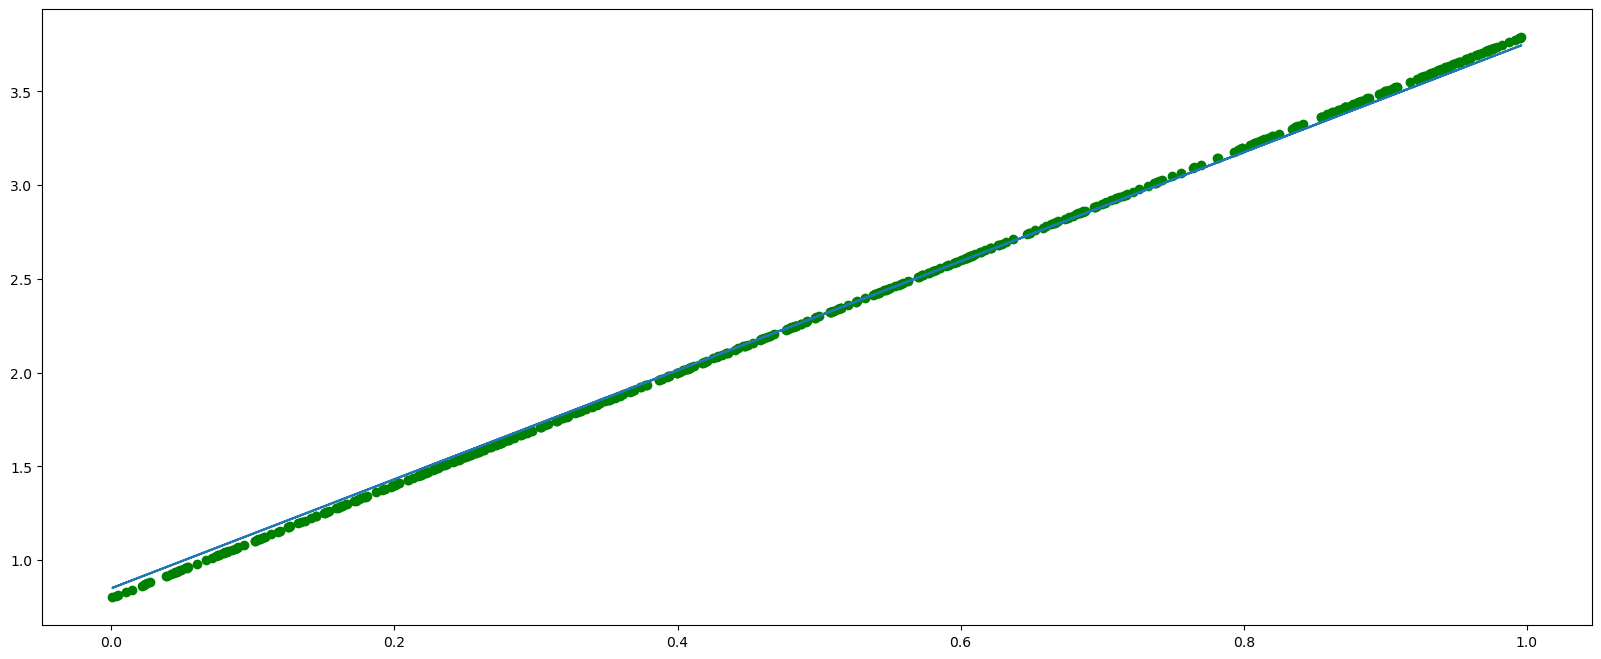

In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,8))
plt.scatter(x.data.numpy(), y.data.numpy(), c='g')
plt.plot(x.data.numpy(), y_pred.data.numpy())
plt.show()